In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import cmath
import scipy
from scipy import interpolate
from scipy import integrate
np.set_printoptions(threshold=sys.maxsize)
N = 10000 # number of iterator steps
H_to_K = 1/0.000003166808534191

In [2]:
def percent_diff(x1,x2):
    C = (x2-x1)*(1/x1)*100
    return C

## Check dr first, let Y = psi(r2)/psi'(r2), converge Y wrt, dr
## let N = number of points = int((r2-r1)/dr + 1)

# $V(r) = \frac{C_{12}}{r^{12}} - \frac{C_{6}}{r^{6}}$
## $C_{12} = 3.05\times10^{8} E_{h}a_{0}, C_{6} = 4710 E_{h}a_{0}$
## $r_{1} + N \cdot dr = r_{2}$

C:\Users\nienn\AppData\Local\Temp\ipykernel_3696\2586906911.py:17: RuntimeWarning: invalid value encountered in sqrt
  k = np.sqrt(2*mu*(Eo - Vr))


 dr = 0.005902338007206822
 min of Vr = -5741.95293656363K
 r1max = 6.33694314956665ao


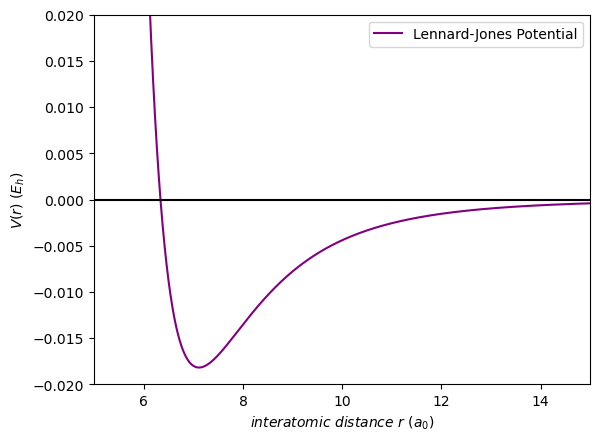

In [6]:
tol = 1e-4
#r1 = np.linspace(1e-2, 6, 500) #rmin in ao
r = np.linspace(4.5,60, N) # range of r values to iterate over, ~0 -> 80 Bohr radii
#psi = np.zeros(N)  # Initializing psi(r) as array of zeros

C12 = 3.05e8 #C12 coefficient in Eh*ao
C6 = 4710 #C6 coefficient in Eh*ao
Vr = (C12*(1/(r**12))) - (C6*(1/(r**6)))
Eo = 1e5*3.166808534191e-12 # inital particle energy, 1uK in Hartrees
me = 9.1093837e-28 # electron mass in grams
mrb_g = 1.4192261e-22 # rubidium mass in grams
mrb = mrb_g*(1/me) # rubidium mass in au
mu = (mrb**2)*(1/(2*mrb)) # reduced mass of rubidium
hbar = 1.0546e-27 # reduced Planck constant in cgs
e = 4.8032e-10 # electron charge in cgs
ao = (hbar**2)*(1/(me*e**2)) # Bohr radius in cgs
k = np.sqrt(2*mu*(Eo - Vr))

lambda_min = (2*np.pi)*(1/(np.sqrt(2*mu*(Eo - min(Vr)))))
#print(f' lambda min = {lambda_min}ao')
#print(f' dr = {lambda_min/20}ao')

dr = lambda_min*(1/20)
print(f' dr = {dr}')

#print(f' mu = {mu}')
plt.plot(r, Vr, label = 'Lennard-Jones Potential', color = 'purple')
plt.hlines(0,0, max(r), color = 'black')
#plt.hlines(Eo,0, max(r), color = 'green')
plt.xlabel('$ interatomic$ $distance$ $r$ $(a_{0})$')
plt.ylabel('$V(r)$ $(E_{h})$')
plt.ylim(-0.02, 0.02)
plt.xlim(5,15)
plt.legend()


print(f' min of Vr = {min(Vr)*H_to_K}K')

def bisection(f, d, b, tol=1e-6):
    """
    Find a root of f(x) in the interval a<x<b, using bisection search.

    A valid interval must have a < b, and f(a) and f(b) must have opposite signs.

    Returns: 
        A root of x0, i.e. a solution to f(x0) = 0.

    Args:
        f: function to be studied; should take one argument.
        a: lower end of search interval
        b: upper end of search interval

        tol: error tolerance for result (default: 1e-6)

     If either f(d) or f(b) is zero, then we already have a solution! """
    
    if f(d) == 0:
        return a
    if f(b) == 0:
        return b

    # Spot check for valid interval
    assert b>d
    if f(b) * 1/f(d) > 0:
        return 'invalid interval'

    while (b-d) > tol:
        c = (d+b)/2
        if f(c) * 1/f(d) < 0:
            # c and a have opposite sign: new interval is [d,c]
            b = c
        elif f(c) * 1/f(b) < 0:
            # c and b have opposite sign: new interval is [c,b]
            d = c
        else:
            # Only other possibility is that f(c) was exactly zero!
            return c
    else:
        return (d+b)*0.5  # Think: why not `return c`?
for i in range(len(Vr)):
    if Vr[i] == min(Vr):
        min_i = i
#print(f'min index = {min_i}')
#print(f'min index of V = {Vr[min_i]*H_to_K}')
def Vrr(r_range):
    LJPotential = (C12*(1/(r_range**12))) - (C6*(1/(r_range**6)))
    return LJPotential
r1max = bisection(Vrr,6,7)
print(f' r1max = {r1max}ao')


# Goal 1: Deal with wave function blowing up (POSTPONED)

# Goal 2: Set r1, r2 resonable, converge the value of Y wrt dr. 
### When setting a new r1, make sure and add additional points to ensure dr is the same 

## $\psi(r_{n+1}) = \frac{2(1-\frac{5}{12}(h)^2k^2_{n})\psi_{n} - (1 + \frac{1}{12}(h)^2k^2_{n-1})\psi_{n-1}}{1 + \frac{1}{12}(h)^2k^2_{n+1}}    $

numpts = 9446
 dr = 0.005902338007206822


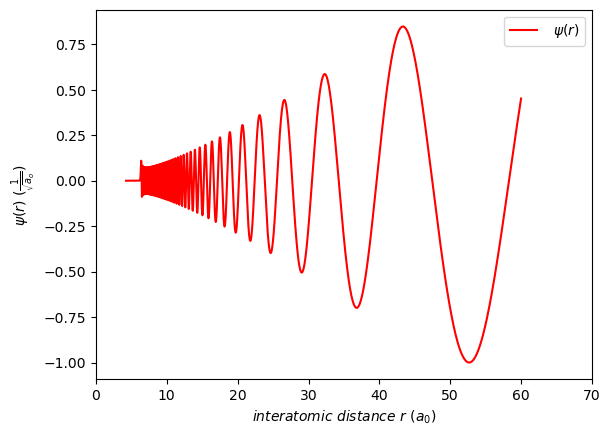

In [39]:
def wavefunction(Energy, M, rmin, rmax, h): # Numerov method function to find psi(r)
    global psi
    r_range = np.linspace(rmin, rmax, M)
    VLJ = (C12*(1/r_range**12)) - (C6*(1/r_range**6))
    psi[0] = 0 # impose boundary condition psi(0) = 0
    psi[1] = 1e-5 # let psi(1) = 1e-5
    #print(f' psi[1] = {psi[1]}')
    #print(f' dr = {h}')
    ksq = 2*mu*(Energy - VLJ) # wave number squared for the energy
    #print(f' len(Psi_fct) = {len(psi)}')
    #print(f' len(r range) = {len(r_range)}')
    #print(f' len(ksq_fct) = {len(ksq)}')
    #print(f' len(VLJ_fct) = {len(VLJ)}')
    for i in range(2,M):  # Numerov Algorithm, range is 2 -> N since psi(0), psi(1) already set
        psi[i] = ((2*(1 - (5/12)*(h**2)*ksq[i-1])*psi[i-1]) - ((1 + (1/12)*(h**2)*ksq[i-2])*psi[i-2]))*(1/(1 + (1/12)*(h**2)*ksq[i]))
        #if i < 50:
            #print(ksq)
            #print(f' first term in numerator is {(2*(1 - (5/12)*(dr**2)*ksq[i-1])*psi[i-1])}')
            #print(f' numerator is {((2*(1 - (5/12)*(dr**2)*ksq[i-1])*psi[i-1]) - ((1 + (1/12)*(dr**2)*ksq[i-2])*psi[i-2]))}')
            #print(f' denominator is {(1 + (1/12)*(dr**2)*ksq[i])}')
            #print(psi[i])
       # if i == 3: 
        #    print(f' for i = {i}')
         #   print(f' psi = {psi[i]}')
          #  print(f' dr = {dr}')
          #  print(f' ksq = {ksq[i]}')

       # if i == 9131:
       #     print(f' for i = {i}')
       #     print(f' psi = {psi[i]}')
       #     print(f' dr = {dr}')
       #     print(f' ksq = {ksq[i]}')
       # Psi_f = psi/abs(max(psi))
    

            
    return psi*(1/max(abs(psi)))

r2 = 60 #r2 in ao
r1 = 4.25 #r1 in ao
numpts = int(((r2 - r1)/dr) + 1)
print(f'numpts = {numpts}')
psi = np.zeros(numpts)

Psi = wavefunction(Eo, numpts, r1, r2, dr)
plt.plot(np.linspace(r1,r2, numpts), Psi, label = f' $\\psi(r)$', color = 'red')
plt.xlabel('$ interatomic$ $distance$ $r$ $(a_{0})$')
plt.ylabel('$\\psi(r)$ ($\\frac{1}{\\sqrt{a_{o}}}$)')
plt.legend()
plt.xlim(0,70)

print(f' dr = {dr}')

### $Y = \left. \frac{\psi(r)}{\psi'(r)} \right|_{r=r2} $ 

half way there!
almost there!


Text(0, 0.5, 'Y')

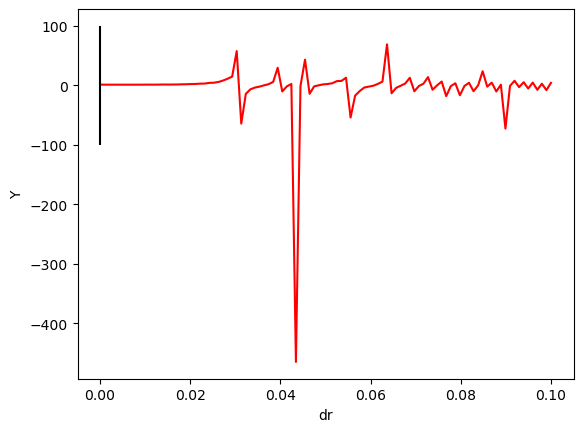

In [12]:
dr_range = np.linspace(1e-5, 1e-1, 100)
r2 = 100 #r2 in ao
r1 = 4.6 #r1 in ao
Y = []
for i in range(len(dr_range)):

    numpts = int(((r2 - r1)*(1/dr_range[i])) + 1)
    rr = np.linspace(r1,r2, numpts)
    #print(f'numpts = {numpts}')
    psi = np.zeros(numpts)
    Psi = wavefunction(Eo, numpts, r1, r2, dr_range[i])
    Psi_prime = np.gradient(Psi, rr)
    if i == int(0.5*len(dr_range)):
        print('half way there!')
    if i == int(0.9*len(dr_range)):
        print('almost there!')
    #if i == int((1*len(dr_range)/1)):
     #   plt.plot(rr, Psi, color = 'gold')
   # if i < 2:
    #plt.plot(rr, Psi, label = f'dr = {dr_range[i]}')
    #if i < 50:
     #   plt.plot(rr, Psi, color = 'gold')
    #if i < 50:
     #   plt.plot(rr, Psi_prime, color = 'gold')
    Yval = Psi[-1]/Psi_prime[-1]
    Y.append(Yval)

plt.plot(dr_range, Y, color = 'red')
plt.vlines(dr_range[0], -100, 100, color = 'black')
plt.xlabel('dr')
plt.ylabel('Y')
#plt.legend()
#print(Y)

In [13]:
for i in range(1,len(Y)):
    if percent_diff(Y[i-1],Y[i]) < 1:
        spacing = dr_range[i]
        print(f' when dr = {spacing}, Y has converged to 1%')
        break

 when dr = 0.00102, Y has converged to 1%


In [14]:
r2_dr_range = np.arange(40, 260, 10)
r2_r  = []
for i in range(len(r2_dr_range)):
    r2_r.append(r2_dr_range[i])
spacing_list = []
for w in r2_r:
    dr_range = np.linspace(1e-5, 1e-1, 100)
    r2 = w #r2 in ao
    r1 = 4.6 #r1 in ao
    Y = []
    for i in range(len(dr_range)):

        numpts = int(((r2 - r1)*(1/dr_range[i])) + 1)
        rr = np.linspace(r1,r2, numpts)
        #print(f'numpts = {numpts}')
        psi = np.zeros(numpts)
        Psi = wavefunction(Eo, numpts, r1, r2, dr_range[i])
        Psi_prime = np.gradient(Psi, rr)
        Yval = Psi[-1]*(1/Psi_prime[-1])
        Y.append(Yval)

    for i in range(1,len(Y)):
        if percent_diff(Y[i-1],Y[i]) < 1:
            spacing = dr_range[i]
            print(f' when dr = {spacing}, Y has converged to 1%')
            break
    spacing_list.append(spacing)

 when dr = 0.00102, Y has converged to 1%
 when dr = 0.00102, Y has converged to 1%
 when dr = 0.00102, Y has converged to 1%
 when dr = 0.00304, Y has converged to 1%
 when dr = 0.00102, Y has converged to 1%
 when dr = 0.00102, Y has converged to 1%
 when dr = 0.00102, Y has converged to 1%
 when dr = 0.00102, Y has converged to 1%
 when dr = 0.00506, Y has converged to 1%
 when dr = 0.00102, Y has converged to 1%
 when dr = 0.00102, Y has converged to 1%
 when dr = 0.00102, Y has converged to 1%
 when dr = 0.00102, Y has converged to 1%
 when dr = 0.00102, Y has converged to 1%
 when dr = 0.00102, Y has converged to 1%
 when dr = 0.00102, Y has converged to 1%
 when dr = 0.00102, Y has converged to 1%
 when dr = 0.00102, Y has converged to 1%
 when dr = 0.00102, Y has converged to 1%
 when dr = 0.00102, Y has converged to 1%
 when dr = 0.00304, Y has converged to 1%
 when dr = 0.00102, Y has converged to 1%


In [15]:
print(int(((1000 - 4.5)*(1/0.00102) + 1)))

975981
